# Face Detector Sample Notebook

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Libraries and Packages

In [4]:
from IPython.display import Image
import IPython.display as display
from PIL import Image as image
import matplotlib.pyplot as plt
import torch
import numpy as np
import os

from BBTNet.model.retinaface import RetinaFace
from BBTNet.reader.widerface import WF_Data
from BBTNet.reader.icartoonface import ICF_Data
from BBTNet.reader.mixed_data import Mixed_Data
from BBTNet.reader.image_reader import read_image, get_PIL_image
from BBTNet.utils.visualize import draw_boxes, draw_different_boxes
from configs import *

## Model Loading

In [140]:
model_wf = RetinaFace(backbone="resnet50")
model_wf.load_state_dict(torch.load("./weights/final_wf_r50.pth"))
model_wf = model_wf.to(device)
model_wf.eval()
print("[INFO] Model is loaded!")

[INFO] Model is loaded!


In [17]:
model_icf = RetinaFace(backbone="resnet50")
model_icf.load_state_dict(torch.load("./weights/final_icf_r50.pth"))
model_icf = model_icf.to(device)
model_mixed.eval()
print("[INFO] Model is loaded!")

[INFO] Model is loaded!


In [46]:
model_mixed = RetinaFace(backbone="resnet50")
model_mixed.load_state_dict(torch.load("./weights/final_mixed_r50.pth"))
model_mixed = model_mixed.to(device)
model_mixed.eval()
print("[INFO] Model is loaded!")

[INFO] Model is loaded!


## Getting Paths of Images to Test

Please change the paths and configs.py file paths w.r.t. your own data storage.

In [151]:
golden_path = "/datasets/COMICS/raw_panel_images/"

golden_imgs = []

### NOTE: Takes long to execute ~1-2mins, comment it to not wait
for dirs in os.listdir(golden_path):
    inter_paths = ["{}{}".format(golden_path + dirs + "/", i) for i in os.listdir(golden_path + dirs + "/")]
    golden_imgs.extend(inter_paths)
    
wf_val_path = wf_path + "val/"
wf_label_path = wf_labels_path + "val/label.txt"
d_wf = WF_Data(wf_val_path, wf_label_path, batch_size=1, augment=False, img_sizes=[-1, -1])

face_imgs = ["{}{}".format("/userfiles/baristopal20/test_data/face/", i) for i in os.listdir("/userfiles/baristopal20/test_data/face/")]
icf_imgs = ["{}{}".format(ICF_val_path, i) for i in os.listdir(ICF_val_path)]
m109_imgs = ["{}{}".format(manga109_path + "train_imgs/", i) for i in os.listdir(manga109_path + "train_imgs/")]
custom_face_imgs = ["{}{}".format(custom_comics_path + "face/", i) for i in os.listdir(custom_comics_path + "face/")]
files_arr = [d_wf.imgs_path, face_imgs, icf_imgs, m109_imgs, custom_face_imgs, golden_imgs]

## Random File Selection

In [240]:
file_arr = files_arr[0]

while True:
    idx = 2 # np.random.randint(len(file_arr))
    path = file_arr[idx] 
    if "/" in path:
        break
print(idx, ")", path)

img = read_image(path, None, augment=False, resize_len=[-1, -1])
init_img = get_PIL_image(img)
img = img.unsqueeze(0)

2 ) /datasets/widerface/WIDER_val/images/0--Parade/0_Parade_marchingband_1_765.jpg


## Model Predictions & Visualization

In [241]:
conf = 0.4
nms_thold = 0.2

cls_mixed, boxes_mixed = model_mixed.predict_image(img, conf_thold=conf, nms_thold=nms_thold)
print("Mixed Model predicts:", cls_mixed.shape[0], "--->", list(cls_mixed))
cls_icf, boxes_icf = model_icf.predict_image(img, conf_thold=conf, nms_thold=nms_thold)
print("ICF Model predicts:", cls_icf.shape[0], "--->", list(cls_icf))
cls_wf, boxes_wf = model_wf.predict_image(img, conf_thold=conf, nms_thold=nms_thold)
print("WF Model predicts:", cls_wf.shape[0], "--->", list(cls_wf))

Mixed Model predicts: 79 ---> [0.7381016, 0.7370679, 0.70283884, 0.683128, 0.6813637, 0.68079364, 0.6780885, 0.6761871, 0.6701006, 0.6676207, 0.6650043, 0.6625261, 0.6558357, 0.65447015, 0.6532, 0.65002704, 0.6455507, 0.6441825, 0.6373893, 0.6363949, 0.63531023, 0.6351708, 0.6333992, 0.63283026, 0.6324158, 0.63219166, 0.6310631, 0.6309962, 0.6304715, 0.6290663, 0.62630135, 0.6262419, 0.6253537, 0.6245001, 0.62131506, 0.6209047, 0.61590105, 0.6108643, 0.61047596, 0.6093599, 0.6084834, 0.6044231, 0.60372794, 0.60333866, 0.60228103, 0.6013731, 0.5975155, 0.5962165, 0.5956142, 0.59159595, 0.5913946, 0.5798985, 0.5759169, 0.57525057, 0.5746893, 0.5741975, 0.565717, 0.56274235, 0.5563629, 0.5509823, 0.54909277, 0.5474878, 0.5458932, 0.5434607, 0.53992563, 0.5348746, 0.52515215, 0.5109985, 0.49603686, 0.49019626, 0.48635373, 0.48134628, 0.46814987, 0.45533782, 0.4552495, 0.45463872, 0.4277691, 0.41082668, 0.40159306]
ICF Model predicts: 2 ---> [0.9497301, 0.41033143]
WF Model predicts: 96 ---

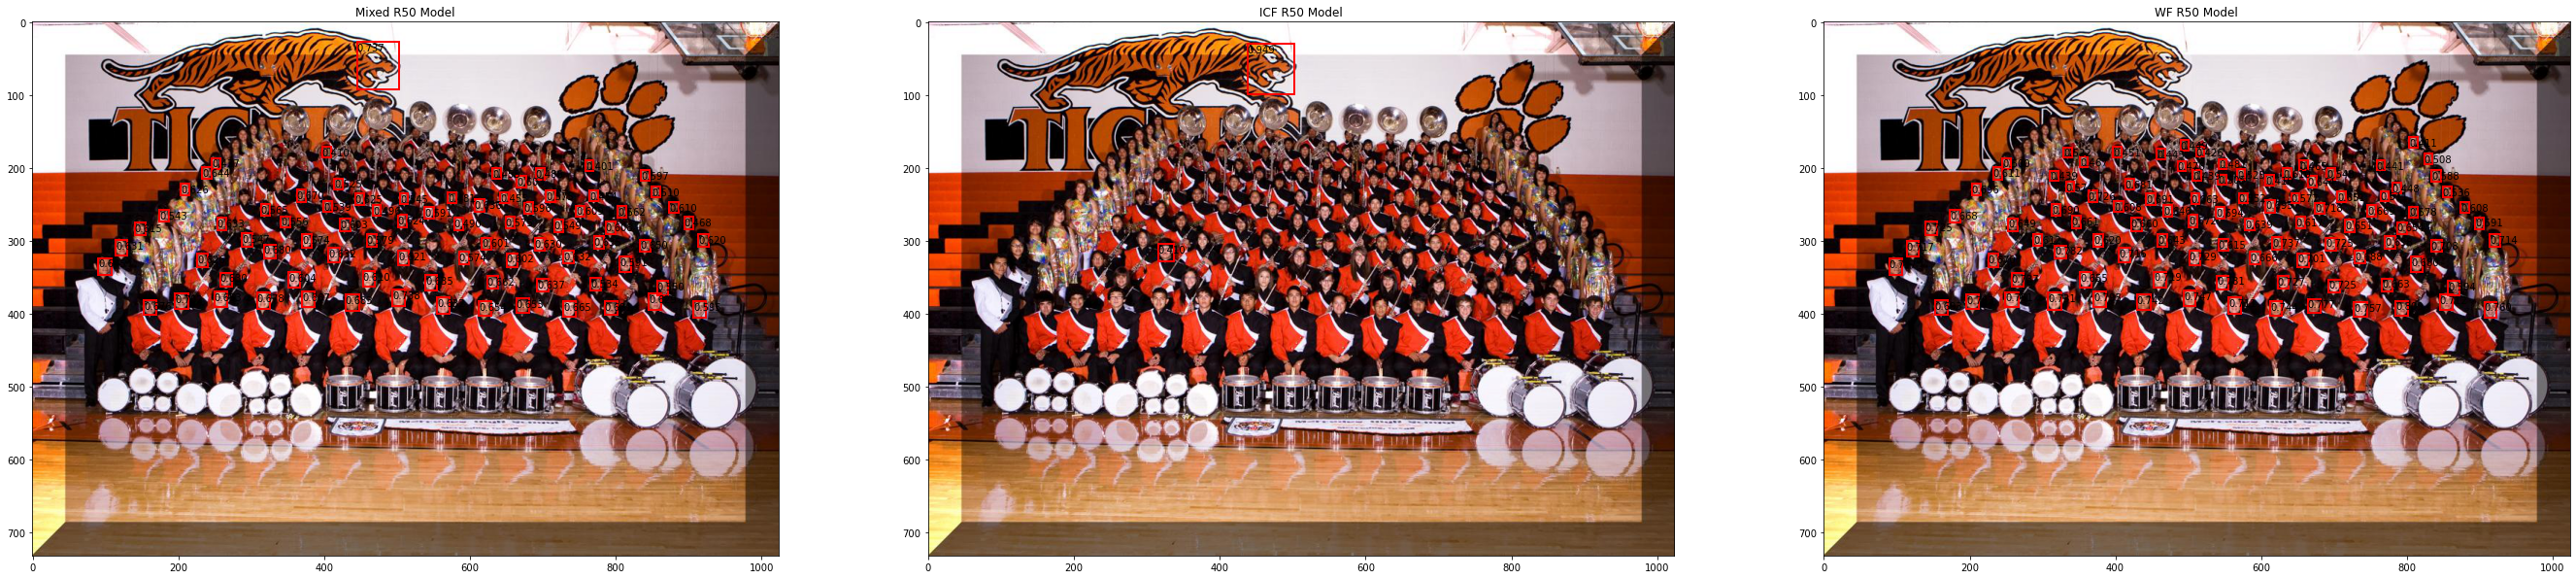

In [242]:
draw_different_boxes(init_img, [boxes_mixed, boxes_icf, boxes_wf], [cls_mixed, cls_icf, cls_wf], ["Mixed R50 Model", "ICF R50 Model", "WF R50 Model"])

In [221]:
# 126 ) /datasets/iCartoonFace2020/personai_icartoonface_detval/personai_icartoonface_detval_13919.jpg